In [1]:
keywords= ['cancer']
search_time_intended = 3650 #in days

#pip install geopy
#pip install folium

In [2]:
import datetime
now = datetime.date.today()

for keyword1 in keywords:
    import sqlite3 #(keyword, years, country, journal, gene) -->years
    
    conn = sqlite3.connect('paper stats2.db')
    c = conn.cursor()
    c.execute("""CREATE TABLE IF NOT EXISTS stats (
    keyword text,
    years text,
    country text,
    journal text,
    gene text,
    date text
    )""")

    #commit the command
    conn.commit()
    c.execute("SELECT date FROM stats WHERE keyword=?",(keyword1,)) #LIKE '%123.com', = >= can be used as well
    items = c.fetchall()
    
n6=str(items)
n_date=n6[3:-4]

import time

    
if len(str(now)) == len(str(n_date)):
    database_date=time.strptime(n_date, '%Y-%m-%d')
    today_date=time.strptime(str(now), '%Y-%m-%d')
    date1=n_date
    date2=str(now)

    year1=int(date1[0:4])
    month1=int(date1[5:7])
    day1=int(date1[8:10])


    year2=int(date2[0:4])
    month2=int(date2[5:7])
    day2=int(date2[8:10])

    from datetime import date

    d0=date(year1,month1,day1)
    d1=date(year2,month2,day2)

    delta=d1-d0
    search_time=delta.days
    print('The search time is '+ str(search_time) +' days.')
        
else:
    search_time=search_time_intended
    print('The search time is '+ str(search_time) +' days.')

The search time is 3650 days.


  0%|          | 0/6059 [00:00<?, ?it/s]

Found 60584 results


100%|██████████| 38991264/38991264 [1:47:35<00:00, 6039.91it/s]


(10, 'myc', "[('2019', 2209), ('2018', 2083), ('2017', 2045), ('2016', 1895), ('2020', 1503), ('2015', 269), ('1993', 2), ('2013', 1)]", "[('China', 4474), ('Japan', 769), ('Germany', 690), ('Italy', 479), ('Australia', 463), ('Spain', 439), ('United States', 429), ('India', 395), ('Canada', 362), ('France', 319)]", "[('Oncotarget', 498), ('Scientific reports', 272), ('PloS one', 188), ('Stem cell research', 177), ('Oncogene', 154)]", "[('mycn', 4505), ('stat3', 2536), ('bcl2', 2362), ('sox2', 2285), ('ndrg1', 1850), ('ndrg2', 1750), ('ar', 1584), ('klf4', 1553), ('mtor', 1531), ('max', 1446), ('tp53', 1399), ('pten', 1393), ('si', 1377), ('nanog', 1304), ('egfr', 1293), ('gc', 1193), ('brd4', 1141), ('kras', 1001), ('bcl6', 992), ('notch1', 980)]", '2020-07-17')
(11, 'coronavirus', "[('2020', 62), ('2019', 747), ('2018', 707), ('2017', 705), ('2016', 784), ('2015', 798), ('2014', 720), ('2013', 572), ('2012', 399), ('2011', 373), ('2010', 387), ('2009', 413), ('2008', 462), ('2007', 4

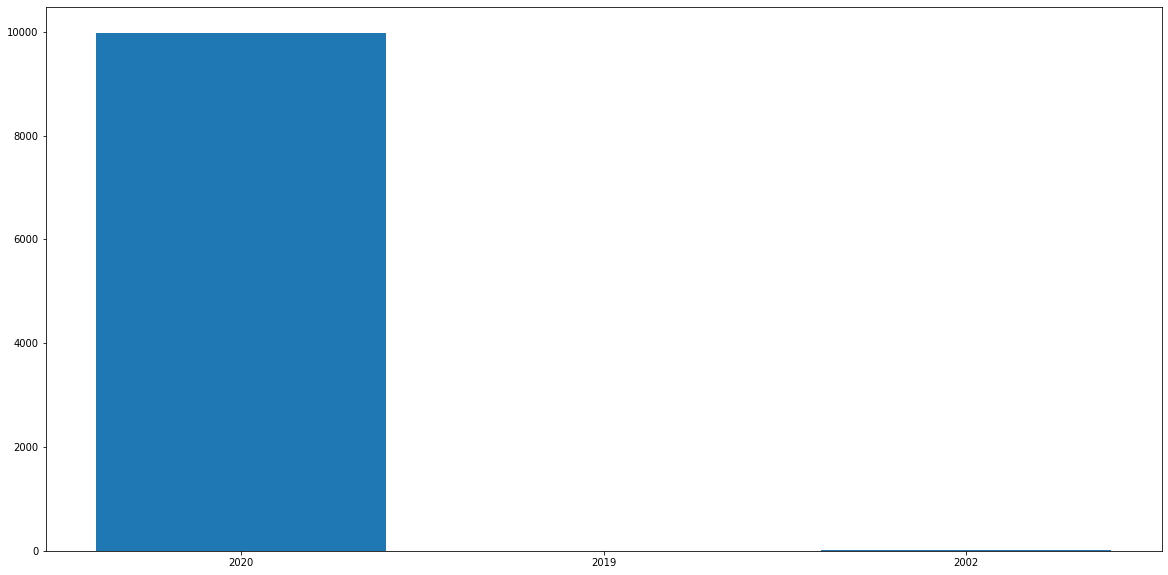

{'Japan': 816, 'China': 713, 'Canada': 670, 'Germany': 613, 'France': 505, 'Australia': 435, 'Italy': 396, 'India': 342, 'Netherlands': 293, 'Sweden': 211}


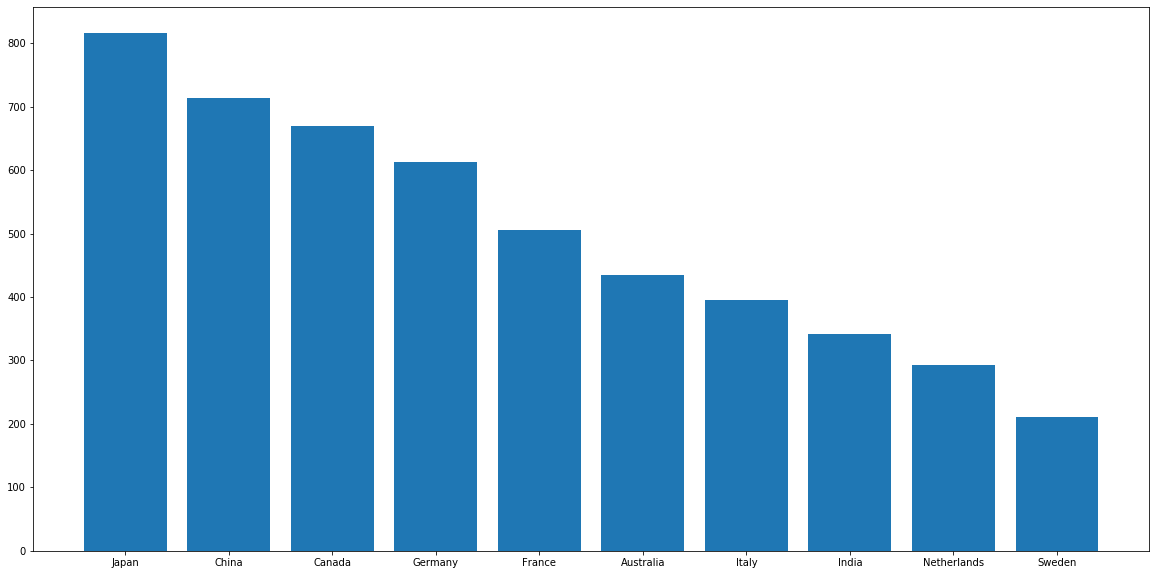

[('Cancers', 176), ('Scientific reports', 139), ('International journal of molecular sciences', 104), ('Journal of thoracic disease', 91), ('Frontiers in oncology', 88)]
<class 'list'>


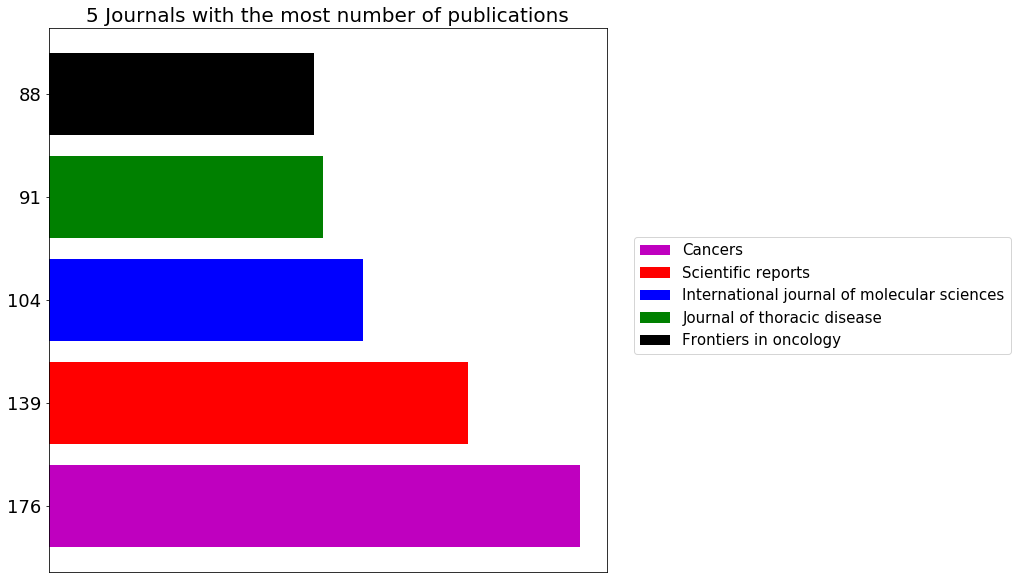

[('si', 3827), ('fas', 3134), ('hr', 3041), ('cd34', 2674), ('brca1', 2478), ('tnf', 2464), ('myc', 2392), ('ar', 2188), ('cd4', 2163), ('des', 2124), ('bcr', 2077), ('pc', 2072), ('egfr', 2036), ('mb', 1743), ('met', 1614), ('bax', 1570), ('nodal', 1523), ('gc', 1472), ('gan', 1460), ('pten', 1404)]


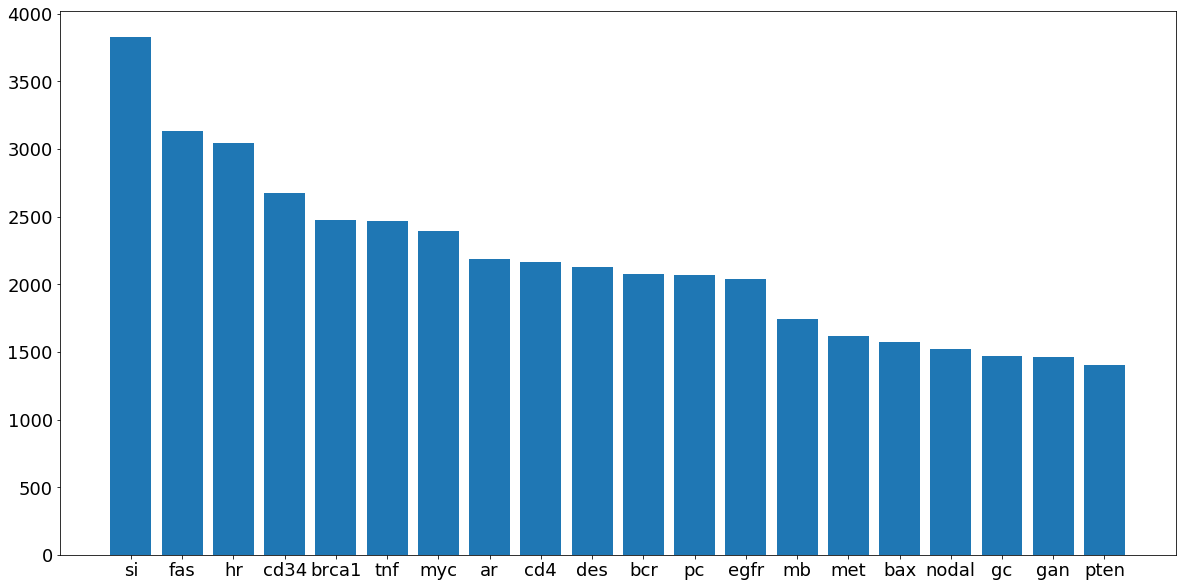

{'si': 3827, 'fas': 3134, 'hr': 3041, 'cd34': 2674, 'brca1': 2478, 'tnf': 2464, 'myc': 2392, 'ar': 2188, 'cd4': 2163, 'des': 2124, 'bcr': 2077, 'pc': 2072, 'egfr': 2036, 'mb': 1743, 'met': 1614, 'bax': 1570, 'nodal': 1523, 'gc': 1472, 'gan': 1460, 'pten': 1404}


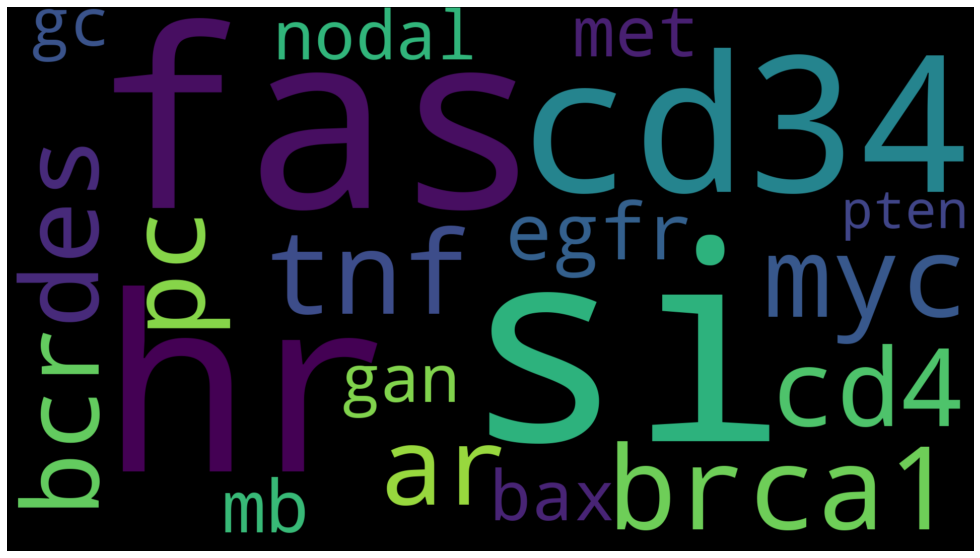

In [9]:
import sqlite3
import datetime
now = datetime.date.today()

conn = sqlite3.connect('paper stats2.db')

#create table (spreadsheet?) using cursor
c = conn.cursor()

#create table
c.execute("""CREATE TABLE IF NOT EXISTS stats (
    keyword text,
    years text,
    country text,
    journal text,
    gene text,
    date text
)""")

#commit the command
conn.commit()

#keyword is not found in database
for keyword1 in keywords:

    from Bio import Entrez #paper published last year about any gene
    from tqdm import tqdm
    import sqlite3 #(keyword, years, country, journal, gene) -->years
    conn = sqlite3.connect('paper stats2.db')
    c = conn.cursor()
    c.execute("SELECT keyword FROM stats")  #LIKE '%123.com', = >= can be used as well
    c1 = c.fetchall()

    out = [item for t in c1 for item in t] 
    

    if keyword1 not in out:
        Entrez.email = "michael_cic@gmail.com"

        #gene of interest (or anything of interest) can be changed here (term), and reldate can be changed
        search_results = Entrez.read(
            Entrez.esearch(
                db="pubmed", term=keyword1, reldate=100, datetype="pdat", usehistory="y"
            )
        )
        count = int(search_results["Count"])
        print("Found %i results" % count)

        batch_size = 10 #max limit of pubmed?

        out_handle = open("recent_papers.txt", "w") #name of file can be changed here
        for start in tqdm(range(0, count, batch_size)):
            end = min(count, start + batch_size)
            #print("Going to download record %i to %i" % (start + 1, end))
            fetch_handle = Entrez.efetch(
                db="pubmed",
                rettype="medline",
                retmode="text",
                retstart=start,
                retmax=batch_size,
                webenv=search_results["WebEnv"],
                query_key=search_results["QueryKey"],
            )
            data = fetch_handle.read()
            fetch_handle.close()
            out_handle.write(data)
        out_handle.close()

        handle = Entrez.esummary(db="pubmed", webenv=search_results["WebEnv"], query_key=search_results["QueryKey"],retmode="xml")
        records = Entrez.read(handle)

        gene_file=open('protein_coding_genes.txt', 'r')

        list_of_lists = []
        for line in gene_file:
            stripped_line = line.strip()
            line_list = stripped_line.split()
            list_of_lists.append(line_list)

        gene_file.close()

        #combine lists into 1 list

        flat_list = []
        for sublist in list_of_lists:
            for item in sublist:
                flat_list.append(item)

        #change into lower case
        flat_list=[x.lower() for x in flat_list]

        #compare the publications' abstract with the list of human genes (this takes some time)

        from tqdm import tqdm #progress bar
        from collections import Counter
        import re

        wanted = flat_list
        cnt = Counter()
        words = re.findall('\w+', open('recent_papers.txt').read().lower()) #remember to use the same file as above
        for word in tqdm(words):
            if word in wanted:
                cnt[word] += 1
        #print (cnt)

        #remove common words that are also a gene name (still more to be added)

        if 'fau' in cnt:
            del cnt['fau']
        if 'eng' in cnt:
            del cnt['eng']
        if 'was' in cnt:
            del cnt['was']
        if 'impact' in cnt:
            del cnt['impact']
        if 'nhs' in cnt:
            del cnt['nhs']
        if 'jun' in cnt:
            del cnt ['jun']
        if 'set' in cnt:
            del cnt ['set']
        if keyword1 in cnt:
            del cnt [keyword1]


        #display the results of high hits

        graph_data_gene={}

        #frequency can be changed here to refine the search
        for gene,frequency in cnt.items():
            if frequency>3:
               graph_data_gene.update({gene: frequency})
        #print (graph_data)

        #bar chart to show the result (cam be improved)

        import matplotlib.pyplot as plt


        sorted_graph_data_gene=sorted(graph_data_gene.items(), key=lambda kv:kv[1], reverse=True)
        twenty_sorted_genes=sorted_graph_data_gene[0:20]

        #print(twenty_sorted_genes)

        list_of_titles=[]
        for record in records:
            for key,value in record.items():
                if key == 'Title':
                    list_of_titles.append(value)

        list_of_authors=[]
        for record in records:
            for key, value in record.items():
                if key == 'LastAuthor':
                    list_of_authors.append(value)

        list_of_pubdates=[]
        for record in records:
            for key, value in record.items():
                if key == 'PubDate':
                    list_of_pubdates.append(value)

        list_of_lastauthors=[]
        for record in records:
            for key, value in record.items():
                if key == 'LastAuthor':
                    list_of_lastauthors.append(value)

        list_of_journalnames=[]
        for record in records:
            for key, value in record.items():
                if key == 'FullJournalName':
                    list_of_journalnames.append(value)
        import collections
        from collections import Counter

        count_journalnames = Counter(list_of_journalnames)
        graph_data_journal={}

        #frequency can be changed here to refine the search
        for journalname,frequency in count_journalnames.items():
            if frequency>=1:
               graph_data_journal.update({journalname: frequency})

        sorted_graph_data_journal=sorted(graph_data_journal.items(), key=lambda kv:kv[1], reverse=True)
        five_sorted_journals=sorted_graph_data_journal[0:5]
        a3=str(five_sorted_journals)


        import datetime
        nowtime = datetime.datetime.now()
        year1=nowtime.year+1

        item1=list(range(1900,year1))

        year_count=0
        year_of_pubdates = {}

        for item2 in item1:
            for item in list_of_pubdates:
                if str(item2) in item:
                    year_count +=1
                    year_of_pubdates[str(item2)]=year_count
            year_count=0


        from collections import OrderedDict
        dict1=year_of_pubdates
        dict2=OrderedDict(sorted(dict1.items(), reverse=True))

        n2=str(dict2)
        a1=n2[12:-1]
        



        import pycountry
        import collections
        from collections import Counter

        list_of_locations=[]

        with open("recent_papers.txt", "r") as f:
            searchlines = f.readlines()

        la1 = 'LA  - '
        for i, line in enumerate(searchlines):
            #for item in list_of_lastauthors:
            if la1 in line:
                for l in searchlines[i-3:i+1]:
                    #print (l)
                    for country in pycountry.countries:
                        if country.name in l:
                            list_of_locations.append(country.name)


        #print (list_of_locations)

        count_countries = Counter(list_of_locations)
        graph_data={}

        #frequency can be changed here to refine the search
        for country,frequency in count_countries.items():
            if frequency>=2:
               graph_data.update({country: frequency})

        sorted_graph_data_countries=sorted(graph_data.items(), key=lambda kv:kv[1], reverse=True)
        a2=str(sorted_graph_data_countries)

        a4=str(twenty_sorted_genes)

        #create database
        import sqlite3

        conn = sqlite3.connect('paper stats2.db')

        #create table (spreadsheet?) using cursor
        c = conn.cursor()

        #create table
        c.execute("""CREATE TABLE IF NOT EXISTS stats (
            keyword text,
            years text,
            country text,
            journal text,
            gene text,
            date text
        )""")

        #commit the command
        conn.commit()

        #app
        import sqlite3


        #query the db and return all records

        def show_all():
            conn = sqlite3.connect('paper stats2.db')

            #create table (spreadsheet?) using cursor
            c = conn.cursor()

            c.execute("SELECT rowid, * FROM stats") 
            items = c.fetchall()

            for item1 in items:
                print (item1)

            conn.commit()


        #a function to add a record to the database
        def add_one(keyword, years, country, journal,gene,date):
            conn = sqlite3.connect('paper stats2.db')
            c = conn.cursor()
            c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (keyword, years, country, journal,gene,date))
            conn.commit()


        #a function to delete a record from the database
        def delet_one(id):
            conn = sqlite3.connect('paper stats2.db')
            c = conn.cursor()
            c.execute("DELETE from stats WHERE rowid = (?)", id)
            conn.commit()

        #a function to add many record to the database
        def add_many_(list):
            conn = sqlite3.connect('paper stats2.db')
            c = conn.cursor()
            c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (list))
            conn.commit()

        import sqlite3 #(keyword, years, country, journal, gene) -->years

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT keyword FROM stats")  #LIKE '%123.com', = >= can be used as well
        c1 = c.fetchall()

        out = [item for t in c1 for item in t] 

        if keyword1 not in out:
            conn = sqlite3.connect('paper stats2.db')
            c = conn.cursor()
            c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (keyword1, a1, a2, a3,a4,now))
            conn.commit()

        show_all()

        import sqlite3 #(keyword, years, country, journal, gene) -->years

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT years FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        
        print ('This is the stats for '+ keyword1)
        n2=str(items)
        n_year=n2[3:-4]
        #print (n_year)
        #print(type(n_year)) #code run into error if only has 1 year

        import ast
        res1 = ast.literal_eval(n_year)

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res1
        dictionary = {} 
        dictionary.update(Convert(tups, dictionary))
        print(dictionary)
        import matplotlib.pyplot as plt

        plt.figure(figsize=(20,10))
        plt.bar(dictionary.keys(), dictionary.values())
        plt.show()

        import sqlite3 #(keyword, years, country, journal, gene)-->country

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT country FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_country=n2[3:-4]

        #figure from dictionary of data
        import ast
        res2 = ast.literal_eval(n_country)
        res=res2[0:10]

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res
        dictionary1 = {} 
        dictionary1.update(Convert(tups, dictionary1))
        print(dictionary1)

        import matplotlib.pyplot as plt

        plt.figure(figsize=(20,10))
        plt.bar(dictionary1.keys(), dictionary1.values())
        plt.show()
        
        import pycountry
        import collections
        from collections import Counter

        import csv
        with open ('test1.csv','w') as f:
            f.write("%s,%s\n"%('Countries', 'No. of publications'))
            for key in dictionary1.keys():
                f.write("%s,%s\n"%(key,dictionary1[key]))

        import pandas as pd
        import geopandas as gpd
        from shapely.geometry import Point
        %matplotlib inline


        df = pd.read_csv('test1.csv')
        df.head()

        
        import geopy
        from geopy.geocoders import Nominatim

        nom=Nominatim(user_agent="my-application1")

        #print (n.latitude, n.longitude)


        df['Coordinates']=df["Countries"].apply(nom.geocode)
        df['Latitude']=df['Coordinates'].apply(lambda x: x.latitude if x!= None else None)
        df['Longitude']=df['Coordinates'].apply(lambda x: x.longitude if x!= None else None)

        #pip install folium

        # Create a world map to show distributions of users 
        import folium
        from folium.plugins import MarkerCluster
        #empty map
        world_map= folium.Map(tiles="cartodbpositron")
        marker_cluster = MarkerCluster().add_to(world_map)
        #for each coordinate, create circlemarker of user percent
        for i in range(len(df)):
                lat = df.iloc[i]['Latitude']
                long = df.iloc[i]['Longitude']
                radius=int(df.iloc[i]['No. of publications'])
                popup_text = """Location : {}<br>
                            No. of publications : {}<br>"""
                popup_text = popup_text.format(df.iloc[i]['Countries'],
                                           df.iloc[i]['No. of publications']
                                           )
                folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
        #show the map
        display(world_map)
        
        import sqlite3 #(keyword, years, country, journal, gene) -->journal

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT journal FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_journal=n2[3:-4]

        import ast
        res = ast.literal_eval(n_journal)
        print(res)
        print(type(res))

        #figure from list of data
        import numpy as np                                                               
        import matplotlib.pyplot as plt

        five_sorted_journals=res[0:5]
        labels, ys = zip(*five_sorted_journals)
        xs = np.arange(len(labels)) 
        plt.figure(figsize=(10,10))
        b=plt.barh(xs, ys, height= 0.8,color=('m','r','b','g','k'))

        plt.title('5 Journals with the most number of publications', fontsize=20)
        #plt.xticks(ys, fontsize=18) #Replace default x-ticks with xs, then replace xs with labels
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.yticks(xs,ys, fontsize=18)

        plt.legend(b,labels, fontsize=15, loc=(1.05,0.4))
        plt.show()

        import sqlite3 #(keyword, years, country, journal, gene) -->gene

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT gene FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_gene=n2[3:-4]

        import ast
        res4 = ast.literal_eval(n_gene)
        print(res4)

        plt.figure(figsize=(20,10))
        labels, ys = zip(*res4)
        xs = np.arange(len(labels)) 
        plt.bar(xs, ys)
        plt.xticks(xs, labels, fontsize=18)
        plt.yticks(fontsize=18)

        plt.show()


        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res4
        dictionary4 = {} 
        dictionary4.update(Convert(tups, dictionary4))
        print(dictionary4)

        #write the comparsion result into a text file for display in wordcloud

        with open('myfile.txt', 'w') as f:
            for genes,value in dictionary4.items():
                while value >0:
                    print (genes, file=f)
                    value-=1

        import os

        from os import path
        from wordcloud import WordCloud

        # get data directory 
        d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

        # Read the whole text.
        text = open(path.join(d, 'myfile.txt')).read()

        # Generate a word cloud image
        wordcloud = WordCloud(width=1920, height=1080, collocations = False).generate(text)

        # Display the generated image:
        # the matplotlib way:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        

    elif keyword1 in out and search_time==0:
        import sqlite3 #(keyword, years, country, journal, gene) -->years

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT years FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        
        print ('This is the stats for '+ keyword1)
        n2=str(items)
        n_year=n2[3:-4]
        #print (n_year)
        #print(type(n_year)) #code run into error if only has 1 year

        import ast
        res1 = ast.literal_eval(n_year)

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res1
        dictionary = {} 
        dictionary.update(Convert(tups, dictionary))
        print(dictionary)
        import matplotlib.pyplot as plt

        plt.figure(figsize=(20,10))
        plt.bar(dictionary.keys(), dictionary.values())
        plt.show()

        import sqlite3 #(keyword, years, country, journal, gene)-->country

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT country FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_country=n2[3:-4]

        #figure from dictionary of data
        import ast
        res2 = ast.literal_eval(n_country)
        res=res2[0:10]

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res
        dictionary1 = {} 
        dictionary1.update(Convert(tups, dictionary1))
        print(dictionary1)

        import matplotlib.pyplot as plt

        plt.figure(figsize=(20,10))
        plt.bar(dictionary1.keys(), dictionary1.values())
        plt.show()
        
        import pycountry
        import collections
        from collections import Counter

        import csv
        with open ('test1.csv','w') as f:
            f.write("%s,%s\n"%('Countries', 'No. of publications'))
            for key in dictionary1.keys():
                f.write("%s,%s\n"%(key,dictionary1[key]))

        import pandas as pd
        import geopandas as gpd
        from shapely.geometry import Point
        %matplotlib inline


        df = pd.read_csv('test1.csv')
        df.head()

        #pip install geopy
        import geopy
        from geopy.geocoders import Nominatim

        nom=Nominatim(user_agent="my-application1")

        #print (n.latitude, n.longitude)


        df['Coordinates']=df["Countries"].apply(nom.geocode)
        df['Latitude']=df['Coordinates'].apply(lambda x: x.latitude if x!= None else None)
        df['Longitude']=df['Coordinates'].apply(lambda x: x.longitude if x!= None else None)

        #pip install folium

        # Create a world map to show distributions of users 
        import folium
        from folium.plugins import MarkerCluster
        #empty map
        world_map= folium.Map(tiles="cartodbpositron")
        marker_cluster = MarkerCluster().add_to(world_map)
        #for each coordinate, create circlemarker of user percent
        for i in range(len(df)):
                lat = df.iloc[i]['Latitude']
                long = df.iloc[i]['Longitude']
                radius=int(df.iloc[i]['No. of publications'])
                popup_text = """Location : {}<br>
                            No. of publications : {}<br>"""
                popup_text = popup_text.format(df.iloc[i]['Countries'],
                                           df.iloc[i]['No. of publications']
                                           )
                folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
        #show the map
        display(world_map)
        
        import sqlite3 #(keyword, years, country, journal, gene) -->journal

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT journal FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_journal=n2[3:-4]

        import ast
        res = ast.literal_eval(n_journal)
        print(res)
        print(type(res))

        #figure from list of data
        import numpy as np                                                               
        import matplotlib.pyplot as plt

        five_sorted_journals=res[0:5]
        labels, ys = zip(*five_sorted_journals)
        xs = np.arange(len(labels)) 
        plt.figure(figsize=(10,10))
        b=plt.barh(xs, ys, height= 0.8,color=('m','r','b','g','k'))

        plt.title('5 Journals with the most number of publications', fontsize=20)
        #plt.xticks(ys, fontsize=18) #Replace default x-ticks with xs, then replace xs with labels
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.yticks(xs,ys, fontsize=18)

        plt.legend(b,labels, fontsize=15, loc=(1.05,0.4))
        plt.show()

        import sqlite3 #(keyword, years, country, journal, gene) -->gene

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT gene FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_gene=n2[3:-4]

        import ast
        res4 = ast.literal_eval(n_gene)
        print(res4)

        plt.figure(figsize=(20,10))
        labels, ys = zip(*res4)
        xs = np.arange(len(labels)) 
        plt.bar(xs, ys)
        plt.xticks(xs, labels, fontsize=18)
        plt.yticks(fontsize=18)

        plt.show()


        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res4
        dictionary4 = {} 
        dictionary4.update(Convert(tups, dictionary4))
        print(dictionary4)

        #write the comparsion result into a text file for display in wordcloud

        with open('myfile.txt', 'w') as f:
            for genes,value in dictionary4.items():
                while value >0:
                    print (genes, file=f)
                    value-=1

        import os

        from os import path
        from wordcloud import WordCloud

        # get data directory 
        d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

        # Read the whole text.
        text = open(path.join(d, 'myfile.txt')).read()

        # Generate a word cloud image
        wordcloud = WordCloud(width=1920, height=1080, collocations = False).generate(text)

        # Display the generated image:
        # the matplotlib way:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        

    elif keyword1 in out and search_time>0:
        Entrez.email = "michael_cic@163.com"

        #gene of interest (or anything of interest) can be changed here (term), and reldate can be changed
        search_results = Entrez.read(
            Entrez.esearch(
                db="pubmed", term=keyword1, mindate=2019/12/31, maxdate=2019/1/1, datetype="pdat", usehistory="y"
            )
        )
        count = int(search_results["Count"])
        print("Found %i results" % count)

        batch_size = 10 #max limit of pubmed?

        out_handle = open("recent_papers.txt", "w") #name of file can be changed here
        for start in tqdm(range(0, count, batch_size)):
            end = min(count, start + batch_size)
            #print("Going to download record %i to %i" % (start + 1, end))
            fetch_handle = Entrez.efetch(
                db="pubmed",
                rettype="medline",
                retmode="text",
                retstart=start,
                retmax=batch_size,
                webenv=search_results["WebEnv"],
                query_key=search_results["QueryKey"],
            )
            data = fetch_handle.read()
            fetch_handle.close()
            out_handle.write(data)
        out_handle.close()

        handle = Entrez.esummary(db="pubmed", webenv=search_results["WebEnv"], query_key=search_results["QueryKey"],retmode="xml")
        records = Entrez.read(handle)

        gene_file=open('protein_coding_genes.txt', 'r')

        list_of_lists = []
        for line in gene_file:
            stripped_line = line.strip()
            line_list = stripped_line.split()
            list_of_lists.append(line_list)

        gene_file.close()

        #combine lists into 1 list

        flat_list = []
        for sublist in list_of_lists:
            for item in sublist:
                flat_list.append(item)

        #change into lower case
        flat_list=[x.lower() for x in flat_list]

        #compare the publications' abstract with the list of human genes (this takes some time)

        from tqdm import tqdm #progress bar
        from collections import Counter
        import re

        wanted = flat_list
        cnt = Counter()
        words = re.findall('\w+', open('recent_papers.txt').read().lower()) #remember to use the same file as above
        for word in tqdm(words):
            if word in wanted:
                cnt[word] += 1
        #print (cnt)

        #remove common words that are also a gene name (still more to be added)

        if 'fau' in cnt:
            del cnt['fau']
        if 'eng' in cnt:
            del cnt['eng']
        if 'was' in cnt:
            del cnt['was']
        if 'impact' in cnt:
            del cnt['impact']
        if 'nhs' in cnt:
            del cnt['nhs']
        if 'jun' in cnt:
            del cnt ['jun']
        if 'set' in cnt:
            del cnt ['set']
        if keyword1 in cnt:
            del cnt [keyword1]


        #display the results of high hits

        graph_data_gene={}

        #frequency can be changed here to refine the search
        for gene,frequency in cnt.items():
            if frequency>3:
               graph_data_gene.update({gene: frequency})
        #print (graph_data)

        #bar chart to show the result (cam be improved)

        import matplotlib.pyplot as plt


        sorted_graph_data_gene=sorted(graph_data_gene.items(), key=lambda kv:kv[1], reverse=True)
        twenty_sorted_genes=sorted_graph_data_gene[0:20]

        #print(twenty_sorted_genes)

        list_of_titles=[]
        for record in records:
            for key,value in record.items():
                if key == 'Title':
                    list_of_titles.append(value)

        list_of_authors=[]
        for record in records:
            for key, value in record.items():
                if key == 'LastAuthor':
                    list_of_authors.append(value)

        list_of_pubdates=[]
        for record in records:
            for key, value in record.items():
                if key == 'PubDate':
                    list_of_pubdates.append(value)

        list_of_lastauthors=[]
        for record in records:
            for key, value in record.items():
                if key == 'LastAuthor':
                    list_of_lastauthors.append(value)

        list_of_journalnames=[]
        for record in records:
            for key, value in record.items():
                if key == 'FullJournalName':
                    list_of_journalnames.append(value)
        import collections
        from collections import Counter

        count_journalnames = Counter(list_of_journalnames)
        graph_data_journal={}

        #frequency can be changed here to refine the search
        for journalname,frequency in count_journalnames.items():
            if frequency>=1:
               graph_data_journal.update({journalname: frequency})

        sorted_graph_data_journal=sorted(graph_data_journal.items(), key=lambda kv:kv[1], reverse=True)
        five_sorted_journals=sorted_graph_data_journal[0:5]
        #a3=str(five_sorted_journals)


        import datetime
        nowtime = datetime.datetime.now()
        year1=nowtime.year+1

        item1=list(range(1900,year1))

        year_count=0
        year_of_pubdates = {}

        for item2 in item1:
            for item in list_of_pubdates:
                if str(item2) in item:
                    year_count +=1
                    year_of_pubdates[str(item2)]=year_count
            year_count=0


        from collections import OrderedDict
        dict1=year_of_pubdates
        dict2=OrderedDict(sorted(dict1.items(), reverse=True))

        n2=str(dict2)
        #a1=n2[12:-1]
        

        import pycountry
        import collections
        from collections import Counter

        list_of_locations=[]

        with open("recent_papers.txt", "r") as f:
            searchlines = f.readlines()

        la1 = 'LA  - '
        for i, line in enumerate(searchlines):
            #for item in list_of_lastauthors:
            if la1 in line:
                for l in searchlines[i-3:i+1]:
                    #print (l)
                    for country in pycountry.countries:
                        if country.name in l:
                            list_of_locations.append(country.name)


        #print (list_of_locations)

        count_countries = Counter(list_of_locations)
        graph_data={}

        #frequency can be changed here to refine the search
        for country,frequency in count_countries.items():
            if frequency>=2:
               graph_data.update({country: frequency})



        #a4=str(twenty_sorted_genes)

        #create database
        import sqlite3

        conn = sqlite3.connect('paper stats2.db')

        #create table (spreadsheet?) using cursor
        c = conn.cursor()

        #create table
        c.execute("""CREATE TABLE IF NOT EXISTS stats (
            keyword text,
            years text,
            country text,
            journal text,
            gene text,
            date text
        )""")

        #commit the command
        conn.commit()

        #app
        import sqlite3


        #query the db and return all records

        def show_all():
            conn = sqlite3.connect('paper stats2.db')

            #create table (spreadsheet?) using cursor
            c = conn.cursor()

            c.execute("SELECT rowid, * FROM stats") 
            items = c.fetchall()

            for item1 in items:
                print (item1)

            conn.commit()


        #a function to add a record to the database
        def add_one(keyword, years, country, journal,gene,date):
            conn = sqlite3.connect('paper stats2.db')
            c = conn.cursor()
            c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (keyword, years, country, journal,gene,date))
            conn.commit()


        #a function to delete a record from the database
        def delet_one(id):
            conn = sqlite3.connect('paper stats2.db')
            c = conn.cursor()
            c.execute("DELETE from stats WHERE rowid = (?)", id)
            conn.commit()

        #a function to add many record to the database
        def add_many_(list):
            conn = sqlite3.connect('paper stats2.db')
            c = conn.cursor()
            c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (list))
            conn.commit()

        import sqlite3 #(keyword, years, country, journal, gene) -->years

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT keyword FROM stats")  #LIKE '%123.com', = >= can be used as well
        c1 = c.fetchall()

        out = [item for t in c1 for item in t] 

        #old data from the database --> go on from here
        #old data from the database --> merge from here
        import sqlite3 #(keyword, years, country, journal, gene)-->country

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT country FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_country=n2[3:-4]

        #figure from dictionary of data
        import ast
        res2 = ast.literal_eval(n_country)
        res=res2[0:10]

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res
        dictionary1 = {} 
        dictionary1.update(Convert(tups, dictionary1))
        #print(dictionary1)
        #print(graph_data)


        def mergeDict(dict1, dict2):
           dict3 = {**dict1, **dict2}
           for key, value in dict3.items():
               if key in dict1 and key in dict2:
                   dict3[key] = value+dict1[key]
           return dict3
        # Merge dictionaries and add values of common keys in a list
        dict_a2 = mergeDict(graph_data,dictionary1)
        #print('Dictionary 3 :')
        #print(dict_a2)
        sorted_graph_data_countries=sorted(dict_a2.items(), key=lambda kv:kv[1], reverse=True)
        a2=str(sorted_graph_data_countries)
        #print(a2)
        #update country done!!!
        
        #old data from the database --> merge from here
        import sqlite3 #(keyword, years, country, journal, gene) -->years

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT years FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()

        print ('This is the stats for '+ keyword1)
        n2=str(items)
        n_year=n2[3:-4]
        #print (n_year)
        #print(type(n_year)) #code run into error if only has 1 year

        import ast
        res1 = ast.literal_eval(n_year)

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res1
        dictionary = {} 
        dictionary.update(Convert(tups, dictionary))
        #print(dictionary)

        import datetime
        nowtime = datetime.datetime.now()
        year1=nowtime.year+1

        item1=list(range(1900,year1))

        year_count=0
        year_of_pubdates = {}

        for item2 in item1:
            for item in list_of_pubdates:
                if str(item2) in item:
                    year_count +=1
                    year_of_pubdates[str(item2)]=year_count
            year_count=0


        from collections import OrderedDict
        dict1=year_of_pubdates
        dict2=OrderedDict(sorted(dict1.items(), reverse=True))


        def mergeDict(dict1, dict2):
           dict3 = {**dict1, **dict2}
           for key, value in dict3.items():
               if key in dict1 and key in dict2:
                   dict3[key] = value+dict1[key]
           return dict3
        # Merge dictionaries and add values of common keys in a list
        dict_a1 = mergeDict(dict2,dictionary)
        #print('Dictionary 3 :')
        #print(dict_a1)

        sorted_graph_data_year=sorted(dict_a1.items(), key=lambda kv:kv[1], reverse=True)
        a1=str(sorted_graph_data_year)
        #print(a1)
        #update year done!!!
        
        #old data from the database --> merge from here
        import sqlite3 #(keyword, years, country, journal, gene) -->journal

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT journal FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_journal=n2[3:-4]

        import ast
        res = ast.literal_eval(n_journal)
        #print(res)

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res
        dictionary = {} 
        dictionary.update(Convert(tups, dictionary))

        def mergeDict(dict1, dict2):
           dict3 = {**dict1, **dict2}
           for key, value in dict3.items():
               if key in dict1 and key in dict2:
                   dict3[key] = value+dict1[key]
           return dict3
        # Merge dictionaries and add values of common keys in a list
        dict_a3 = mergeDict(dictionary,graph_data_journal)

        sorted_graph_data_journal=sorted(dict_a3.items(), key=lambda kv:kv[1], reverse=True)
        five_sorted_journals=sorted_graph_data_journal[0:5]
        a3=str(five_sorted_journals)
        #print(a3)
        
        #old data from the database --> merge from here
        import sqlite3 #(keyword, years, country, journal, gene) -->gene

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT gene FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_gene=n2[3:-4]

        import ast
        res4 = ast.literal_eval(n_gene)

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res4
        dictionary4 = {} 
        dictionary4.update(Convert(tups, dictionary4))

        def mergeDict(dict1, dict2):
           dict3 = {**dict1, **dict2}
           for key, value in dict3.items():
               if key in dict1 and key in dict2:
                   dict3[key] = value+dict1[key]
           return dict3
        # Merge dictionaries and add values of common keys in a list
        dict_a4 = mergeDict(dictionary4,graph_data_gene)
        #print(dict_a4)

        sorted_graph_data_gene=sorted(dict_a4.items(), key=lambda kv:kv[1], reverse=True)
        twenty_sorted_genes=sorted_graph_data_gene[0:20]
        a4=str(twenty_sorted_genes)
        #print(a4)
        
        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("DELETE from stats WHERE keyword=?", (keyword1,))
        conn.commit()
        
        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (keyword1, a1, a2, a3,a4,now))
        conn.commit()
        
        import sqlite3 #(keyword, years, country, journal, gene) -->years

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT years FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()

        n2=str(items)
        n_year=n2[3:-4]
        #print (n_year)
        #print(type(n_year)) #code run into error if only has 1 year

        import ast
        res1 = ast.literal_eval(n_year)

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res1
        dictionary = {} 
        dictionary.update(Convert(tups, dictionary))
        print(dictionary)
        import matplotlib.pyplot as plt

        plt.figure(figsize=(20,10))
        plt.bar(dictionary.keys(), dictionary.values())
        plt.show()

        import sqlite3 #(keyword, years, country, journal, gene)-->country

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT country FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_country=n2[3:-4]

        #figure from dictionary of data
        import ast
        res2 = ast.literal_eval(n_country)
        res=res2[0:10]

        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res
        dictionary1 = {} 
        dictionary1.update(Convert(tups, dictionary1))
        print(dictionary1)

        import matplotlib.pyplot as plt

        plt.figure(figsize=(20,10))
        plt.bar(dictionary1.keys(), dictionary1.values())
        plt.show()

        import pycountry
        import collections
        from collections import Counter

        import csv
        with open ('test1.csv','w') as f:
            f.write("%s,%s\n"%('Countries', 'No. of publications'))
            for key in dictionary1.keys():
                f.write("%s,%s\n"%(key,dictionary1[key]))

        import pandas as pd
        import geopandas as gpd
        from shapely.geometry import Point
        %matplotlib inline


        df = pd.read_csv('test1.csv')
        df.head()

        #pip install geopy
        import geopy
        from geopy.geocoders import Nominatim

        nom=Nominatim(user_agent="my-application1")

        #print (n.latitude, n.longitude)


        df['Coordinates']=df["Countries"].apply(nom.geocode)
        df['Latitude']=df['Coordinates'].apply(lambda x: x.latitude if x!= None else None)
        df['Longitude']=df['Coordinates'].apply(lambda x: x.longitude if x!= None else None)

        #pip install folium

        # Create a world map to show distributions of users 
        import folium
        from folium.plugins import MarkerCluster
        #empty map
        world_map= folium.Map(tiles="cartodbpositron")
        marker_cluster = MarkerCluster().add_to(world_map)
        #for each coordinate, create circlemarker of user percent
        for i in range(len(df)):
                lat = df.iloc[i]['Latitude']
                long = df.iloc[i]['Longitude']
                radius=int(df.iloc[i]['No. of publications'])
                popup_text = """Location : {}<br>
                            No. of publications : {}<br>"""
                popup_text = popup_text.format(df.iloc[i]['Countries'],
                                           df.iloc[i]['No. of publications']
                                           )
                folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
        #show the map
        display(world_map)

        import sqlite3 #(keyword, years, country, journal, gene) -->journal

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT journal FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_journal=n2[3:-4]

        import ast
        res = ast.literal_eval(n_journal)
        print(res)
        print(type(res))

        #figure from list of data
        import numpy as np                                                               
        import matplotlib.pyplot as plt

        five_sorted_journals=res[0:5]
        labels, ys = zip(*five_sorted_journals)
        xs = np.arange(len(labels)) 
        plt.figure(figsize=(10,10))
        b=plt.barh(xs, ys, height= 0.8,color=('m','r','b','g','k'))

        plt.title('5 Journals with the most number of publications', fontsize=20)
        #plt.xticks(ys, fontsize=18) #Replace default x-ticks with xs, then replace xs with labels
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.yticks(xs,ys, fontsize=18)

        plt.legend(b,labels, fontsize=15, loc=(1.05,0.4))
        plt.show()

        import sqlite3 #(keyword, years, country, journal, gene) -->gene

        conn = sqlite3.connect('paper stats2.db')
        c = conn.cursor()
        c.execute("SELECT gene FROM stats WHERE keyword=?", (keyword1,)) #LIKE '%123.com', = >= can be used as well
        items = c.fetchall()
        n2=str(items)
        n_gene=n2[3:-4]

        import ast
        res4 = ast.literal_eval(n_gene)
        print(res4)

        plt.figure(figsize=(20,10))
        labels, ys = zip(*res4)
        xs = np.arange(len(labels)) 
        plt.bar(xs, ys)
        plt.xticks(xs, labels, fontsize=18)
        plt.yticks(fontsize=18)

        plt.show()


        def Convert(tup, di): 
            di = dict(tup) 
            return di

        # Driver Code     
        tups = res4
        dictionary4 = {} 
        dictionary4.update(Convert(tups, dictionary4))
        print(dictionary4)

        #write the comparsion result into a text file for display in wordcloud

        with open('myfile.txt', 'w') as f:
            for genes,value in dictionary4.items():
                while value >0:
                    print (genes, file=f)
                    value-=1

        import os

        from os import path
        from wordcloud import WordCloud

        # get data directory 
        d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

        # Read the whole text.
        text = open(path.join(d, 'myfile.txt')).read()

        # Generate a word cloud image
        wordcloud = WordCloud(width=1920, height=1080, collocations = False).generate(text)

        # Display the generated image:
        # the matplotlib way:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [6]:
def show_all():
    conn = sqlite3.connect('paper stats2.db')

    #create table (spreadsheet?) using cursor
    c = conn.cursor()

    c.execute("SELECT rowid, * FROM stats") 
    items = c.fetchall()

    for item1 in items:
        print (item1)

    conn.commit()


#a function to add a record to the database
def add_one(keyword, years, country, journal,gene,date):
    conn = sqlite3.connect('paper stats2.db')
    c = conn.cursor()
    c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (keyword, years, country, journal,gene,date))
    conn.commit()


#a function to delete a record from the database
def delet_one(id):
    conn = sqlite3.connect('paper stats2.db')
    c = conn.cursor()
    c.execute("DELETE from stats WHERE rowid = (?)", id)
    conn.commit()

#a function to add many record to the database
def add_many_(list):
    conn = sqlite3.connect('paper stats2.db')
    c = conn.cursor()
    c.execute("INSERT INTO stats VALUES (?,?,?,?,?,?)", (list))
    conn.commit()

In [10]:
show_all()

(10, 'myc', "[('2019', 2209), ('2018', 2083), ('2017', 2045), ('2016', 1895), ('2020', 1503), ('2015', 269), ('1993', 2), ('2013', 1)]", "[('China', 4474), ('Japan', 769), ('Germany', 690), ('Italy', 479), ('Australia', 463), ('Spain', 439), ('United States', 429), ('India', 395), ('Canada', 362), ('France', 319)]", "[('Oncotarget', 498), ('Scientific reports', 272), ('PloS one', 188), ('Stem cell research', 177), ('Oncogene', 154)]", "[('mycn', 4505), ('stat3', 2536), ('bcl2', 2362), ('sox2', 2285), ('ndrg1', 1850), ('ndrg2', 1750), ('ar', 1584), ('klf4', 1553), ('mtor', 1531), ('max', 1446), ('tp53', 1399), ('pten', 1393), ('si', 1377), ('nanog', 1304), ('egfr', 1293), ('gc', 1193), ('brd4', 1141), ('kras', 1001), ('bcl6', 992), ('notch1', 980)]", '2020-07-17')
(11, 'coronavirus', "[('2020', 62), ('2019', 747), ('2018', 707), ('2017', 705), ('2016', 784), ('2015', 798), ('2014', 720), ('2013', 572), ('2012', 399), ('2011', 373), ('2010', 387), ('2009', 413), ('2008', 462), ('2007', 4

In [15]:
delet_one('')

ProgrammingError: Incorrect number of bindings supplied. The current statement uses 1, and there are 0 supplied.

[{'Item': [], 'Id': '32644139', 'PubDate': '2020 Jul 1', 'EPubDate': '2020 Jul 1', 'Source': 'JAMA Netw Open', 'AuthorList': ['Semnani-Azad Z', 'Khan TA', 'Blanco Mejia S', 'de Souza RJ', 'Leiter LA', 'Kendall CWC', 'Hanley AJ', 'Sievenpiper JL'], 'LastAuthor': 'Sievenpiper JL', 'Title': 'Association of Major Food Sources of Fructose-Containing Sugars With Incident Metabolic Syndrome: A Systematic Review and Meta-analysis.', 'Volume': '3', 'Issue': '7', 'Pages': 'e209993', 'LangList': ['English'], 'NlmUniqueID': '101729235', 'ISSN': '', 'ESSN': '2574-3805', 'PubTypeList': ['Journal Article'], 'RecordStatus': 'PubMed - in process', 'PubStatus': 'epublish', 'ArticleIds': {'medline': [], 'pubmed': ['32644139'], 'pii': '2768092', 'doi': '10.1001/jamanetworkopen.2020.9993', 'pmc': 'PMC7348689', 'rid': '32644139', 'eid': '32644139', 'pmcid': 'pmc-id: PMC7348689;'}, 'DOI': '10.1001/jamanetworkopen.2020.9993', 'History': {'medline': ['2020/07/10 06:00'], 'pubmed': ['2020/07/10 06:00'], 'entrez